In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [4]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from keras.optimizers import SGD
import tensorflow as tf
# tf.python.control_flow_ops = tf

In [6]:
### LOAD DATA ###

path_to_dataset = "/Users/Kyle/Code/deep-learning-keras-tensorflow/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [7]:
X_test_orig = X_test

In [8]:
### DATA PREPROCESSING ###

img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [11]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [12]:
#Initializing the values for the convolution neural network
nb_epoch = 5
batch_size = 256

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### MODEL ARCHITECTURE DESCRIPTION ###

#### Reduce Number of Filters to Decrease Runtime, but Decrease Accuracy ####

ConvLayer with 32 filters of 3 by 3

relu activation

Pooling layer of 2x2

ConvLayer with 32 filters of 3 by 3

relu activation

Pooling layer of 2x2

drop out of 0.2

fully connected layer with 128 neurons

relu activation

drop out of 0.5

fully connected layer with 128 neurons

relu activation

fully connected layer with neuron for every class

softmax activation

In [14]:
### MODEL ###

model = Sequential()

model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3,))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=5,verbose=1,
          validation_data=(X_test, Y_test))

# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

/Users/Kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  import sys
/Users/Kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/Users/Kyle/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 390us/step - loss: 2.2567 - acc: 0.1840 - val_loss: 2.1206 - val_acc: 0.5415
Epoch 2/5
60000/60000 [==============================] - 23s 383us/step - loss: 1.7898 - acc: 0.4067 - val_loss: 0.9596 - val_acc: 0.7547
Epoch 3/5
60000/60000 [==============================] - 23s 386us/step - loss: 1.0746 - acc: 0.6388 - val_loss: 0.5500 - val_acc: 0.8487
Epoch 4/5
60000/60000 [==============================] - 23s 387us/step - loss: 0.7773 - acc: 0.7413 - val_loss: 0.4014 - val_acc: 0.8906
Epoch 5/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.6314 - acc: 0.7944 - val_loss: 0.3280 - val_acc: 0.9102
Test score: 0.327951555717
Test accuracy: 0.9102


In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

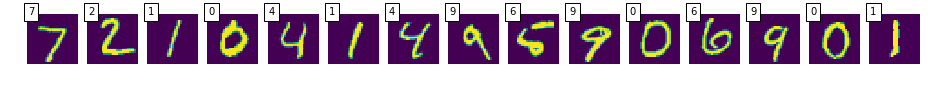

In [16]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')